In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [2]:
def swap(A, i, j):
    a = A[j]
    A[j] = A[i]
    A[i] = a
    # also in python A[i],A[j]=A[j],A[i]

In [3]:
def merge_sort(arr,lb,ub):
    if(ub<=lb):
        return
    elif(lb<ub):
        mid =(lb+ub)//2
        yield from merge_sort(arr,lb,mid)
        yield from merge_sort(arr,mid+1,ub)
        yield from merge(arr,lb,mid,ub)
        yield arr
def merge(arr,lb,mid,ub):
    new = []
    i = lb
    j = mid+1
    while(i<=mid and j<=ub):
        if(arr[i]<arr[j]):
            new.append(arr[i])
            i+=1
        else:
            new.append(arr[j])
            j+=1
    if(i>mid):
        while(j<=ub):
            new.append(arr[j])
            j+=1
    else:
        while(i<=mid):
            new.append(arr[i])
            i+=1
    for i,val in enumerate(new):
        arr[lb+i] = val
        yield arr

In [6]:
n = int(input("Enter the number of elements:"))
al = int(input("Choose algorithm:  1.Bubble \n 2.Insertion \n 3.Quick \n 4.Selection \n 5.Merge Sort"))
array = [i + 1 for i in range(n)]
random.shuffle(array)
if(al==1):
    title = "Bubble Sort"
    algo = sort_buble(array)
elif(al==2):
    title = "Insertion Sort"
    algo = insertion_sort(array)
elif(al==3):
    title = "Quick Sort"
    algo = quick_Sort(array,0,n-1)
elif(al==4):
    title="Selection Sort"
    algo = selection_sort(array)
elif (al == 5):
    title = "Merge Sort"
    algo=merge_sort(array,0,n-1)

Enter the number of elements:20
Choose algorithm:  1.Bubble 
 2.Insertion 
 3.Quick 
 4.Selection 
 5.Merge Sort5


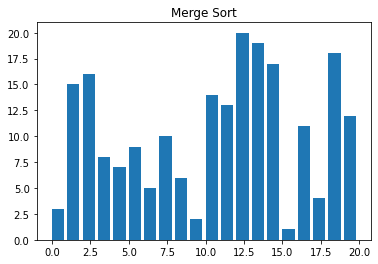

In [7]:
fig, ax = plt.subplots()
ax.set_title(title)
bar_rec = ax.bar(range(len(array)), array, align='edge')
text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

In [8]:
epochs = [0]
def update_plot(array, rec, epochs):
    for rec, val in zip(rec, array):
        rec.set_height(val)
    epochs[0]+= 1
    text.set_text("No.of operations :{}".format(epochs[0]))

In [9]:
anima = anim.FuncAnimation(fig, func=update_plot, fargs=(bar_rec, epochs), frames=algo, interval=1, repeat=False)
plt.show()

Enter number of integers: 20
Enter sorting method:
(b)ubble
(i)nsertion
(m)erge         
(q)uick
(s)election
m


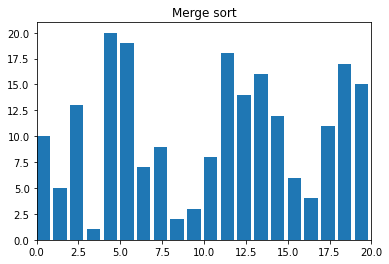

In [10]:
import random
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# NOTE: Python version >=3.3 is required, due to "yield from" feature.

def swap(A, i, j):
    """Helper function to swap elements i and j of list A."""

    if i != j:
        A[i], A[j] = A[j], A[i]

def bubblesort(A):
    """In-place bubble sort."""

    if len(A) == 1:
        return

    swapped = True
    for i in range(len(A) - 1):
        if not swapped:
            break
        swapped = False
        for j in range(len(A) - 1 - i):
            if A[j] > A[j + 1]:
                swap(A, j, j + 1)
                swapped = True
            yield A

def insertionsort(A):
    """In-place insertion sort."""

    for i in range(1, len(A)):
        j = i
        while j > 0 and A[j] < A[j - 1]:
            swap(A, j, j - 1)
            j -= 1
            yield A

def mergesort(A, start, end):
    """Merge sort."""

    if end <= start:
        return

    mid = start + ((end - start + 1) // 2) - 1
    yield from mergesort(A, start, mid)
    yield from mergesort(A, mid + 1, end)
    yield from merge(A, start, mid, end)
    yield A

def merge(A, start, mid, end):
    """Helper function for merge sort."""
    
    merged = []
    leftIdx = start
    rightIdx = mid + 1

    while leftIdx <= mid and rightIdx <= end:
        if A[leftIdx] < A[rightIdx]:
            merged.append(A[leftIdx])
            leftIdx += 1
        else:
            merged.append(A[rightIdx])
            rightIdx += 1

    while leftIdx <= mid:
        merged.append(A[leftIdx])
        leftIdx += 1

    while rightIdx <= end:
        merged.append(A[rightIdx])
        rightIdx += 1

    for i, sorted_val in enumerate(merged):
        A[start + i] = sorted_val
        yield A

def quicksort(A, start, end):
    """In-place quicksort."""

    if start >= end:
        return

    pivot = A[end]
    pivotIdx = start

    for i in range(start, end):
        if A[i] < pivot:
            swap(A, i, pivotIdx)
            pivotIdx += 1
        yield A
    swap(A, end, pivotIdx)
    yield A

    yield from quicksort(A, start, pivotIdx - 1)
    yield from quicksort(A, pivotIdx + 1, end)

def selectionsort(A):
    """In-place selection sort."""
    if len(A) == 1:
        return

    for i in range(len(A)):
        # Find minimum unsorted value.
        minVal = A[i]
        minIdx = i
        for j in range(i, len(A)):
            if A[j] < minVal:
                minVal = A[j]
                minIdx = j
            yield A
        swap(A, i, minIdx)
        yield A

if __name__ == "__main__":
    # Get user input to determine range of integers (1 to N) and desired
    # sorting method (algorithm).
    N = int(input("Enter number of integers: "))
    method_msg = "Enter sorting method:\n(b)ubble\n(i)nsertion\n(m)erge \
        \n(q)uick\n(s)election\n"
    method = input(method_msg)

    # Build and randomly shuffle list of integers.
    A = [x + 1 for x in range(N)]
    random.seed(time.time())
    random.shuffle(A)

    # Get appropriate generator to supply to matplotlib FuncAnimation method.
    if method == "b":
        title = "Bubble sort"
        generator = bubblesort(A)
    elif method == "i":
        title = "Insertion sort"
        generator = insertionsort(A)
    elif method == "m":
        title = "Merge sort"
        generator = mergesort(A, 0, N - 1)
    elif method == "q":
        title = "Quicksort"
        generator = quicksort(A, 0, N - 1)
    else:
        title = "Selection sort"
        generator = selectionsort(A)

    # Initialize figure and axis.
    fig, ax = plt.subplots()
    ax.set_title(title)

    # Initialize a bar plot. Note that matplotlib.pyplot.bar() returns a
    # list of rectangles (with each bar in the bar plot corresponding
    # to one rectangle), which we store in bar_rects.
    bar_rects = ax.bar(range(len(A)), A, align="edge")

    # Set axis limits. Set y axis upper limit high enough that the tops of
    # the bars won't overlap with the text label.
    ax.set_xlim(0, N)
    ax.set_ylim(0, int(1.07 * N))

    # Place a text label in the upper-left corner of the plot to display
    # number of operations performed by the sorting algorithm (each "yield"
    # is treated as 1 operation).
    text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    # Define function update_fig() for use with matplotlib.pyplot.FuncAnimation().
    # To track the number of operations, i.e., iterations through which the
    # animation has gone, define a variable "iteration". This variable will
    # be passed to update_fig() to update the text label, and will also be
    # incremented in update_fig(). For this increment to be reflected outside
    # the function, we make "iteration" a list of 1 element, since lists (and
    # other mutable objects) are passed by reference (but an integer would be
    # passed by value).
    # NOTE: Alternatively, iteration could be re-declared within update_fig()
    # with the "global" keyword (or "nonlocal" keyword).
    iteration = [0]
    def update_fig(A, rects, iteration):
        for rect, val in zip(rects, A):
            rect.set_height(val)
        iteration[0] += 1
        text.set_text("# of operations: {}".format(iteration[0]))

    anim = animation.FuncAnimation(fig, func=update_fig,
        fargs=(bar_rects, iteration), frames=generator, interval=1,
        repeat=False)
    plt.show()